In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("EURUSD2018.csv", header=None)

In [17]:
data.head()

,0,1,2,3,4,5,6
0,2018.01.01,17:00,1.20037,1.20100,1.20037,1.20100,0
1,2018.01.01,17:01,1.20083,1.20095,1.20017,1.20030,0
2,2018.01.01,17:02,1.20035,1.20043,1.20035,1.20043,0
3,2018.01.01,17:03,1.20041,1.20050,1.20031,1.20046,0
4,2018.01.01,17:04,1.20049,1.20049,1.20046,1.20048,0


In [18]:
for index, row in data.iterrows():
    data.at[index, 2] = sum(row[2:6])/4

In [13]:
data = data.drop(columns=[3,4,5,6])

In [14]:
data.head()

,0,1,2
0,2018.01.01,17:00,1.20037
1,2018.01.01,17:01,1.20083
2,2018.01.01,17:02,1.20035
3,2018.01.01,17:03,1.20041
4,2018.01.01,17:04,1.20049


In [9]:
prices = data[2]

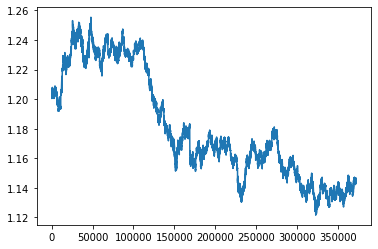

In [11]:
plt.plot(prices)

In [13]:
pr_slice = prices[:100000]

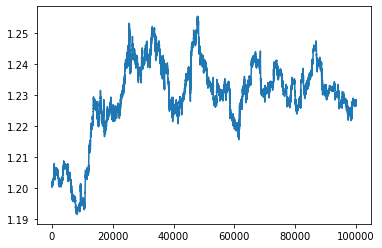

In [14]:
plt.plot(pr_slice)

In [16]:
pr_slice.head()

0    1.200685
1    1.200562
2    1.200390
3    1.200420
4    1.200480
Name: 2, dtype: float64

In [22]:
gap = 5
pr_slice_gap = pd.Series(
    [sum(pr_slice[i*gap:(i+1)*gap])/gap for i in range(int(len(pr_slice)/gap))]
)
        

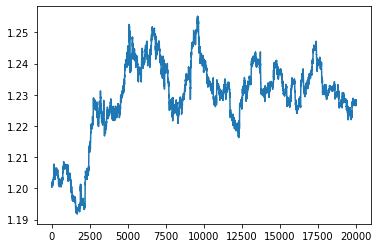

In [24]:
plt.plot(pr_slice_gap)

In [40]:
eps = 20
intervals = []

i = 20
while i < 10000:
    for j in range(i-eps, i):
        if (pr_slice_gap[i] - pr_slice_gap[j])/pr_slice_gap[j] > 0.003:
            print("Found!")
            intervals.append(pr_slice_gap[i-2*eps : i+4*eps])
            i += 2*eps
            break
    i += 1
            


Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!
Found!


In [41]:
len(intervals)

27

In [42]:
intervals[0]

1837    1.193979
1838    1.193804
1839    1.193812
1840    1.193846
1841    1.193741
          ...   
1952    1.195828
1953    1.196033
1954    1.196043
1955    1.195347
1956    1.196071
Length: 120, dtype: float64

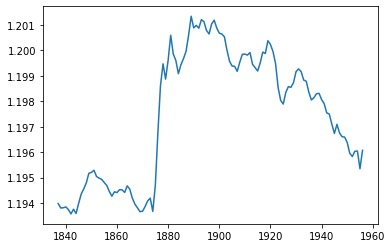

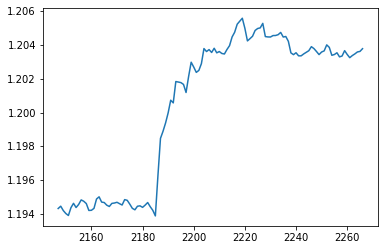

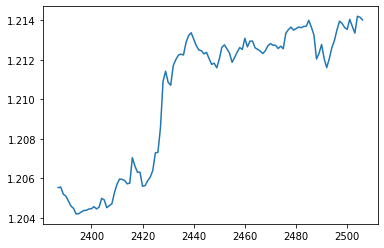

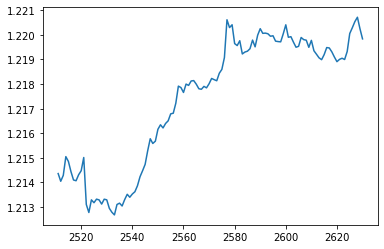

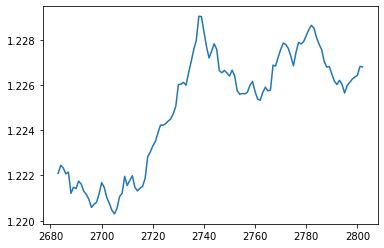

In [43]:
for i in range(5):
    plt.plot(intervals[i])
    plt.show()
